<h3> Applying Random Forest to Dataset </h3>

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('diabetes.csv')  
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data['Glucose'][data['Glucose'] == 0] = data['Glucose'].median()
data['BloodPressure'][data['BloodPressure'] == 0] = data['BloodPressure'].median()
data['SkinThickness'][data['SkinThickness'] == 0] = data['SkinThickness'].median()
data['BMI'][data['BMI'] == 0] = data['BMI'].median()

/home/lmountjoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/lmountjoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lmountjoy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from th

<h4> Split Data into Training and Testing </h4>

In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<h4> Grid Search to determine hyper parameters </h4>

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()
parameters = {'n_estimators':[1, 5, 10, 20], 
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy'], 
              'min_samples_leaf': [1, 2, 4],
              'max_depth':[3,5,8,10],
             }

clf = GridSearchCV(RFC, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [1, 5, 10, 20]})

In [6]:
clf.best_score_, clf.best_params_

(0.7818472610955618,
 {'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'n_estimators': 20})

<h4> Pass best params and train model </h4>

In [7]:
FinalRFC = RandomForestClassifier()
FinalRFC.set_params(**clf.best_params_)

FinalRFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20)

<h4> Scoring </h4>

In [8]:
print(FinalRFC.score(X_train, y_train))
print(FinalRFC.score(X_test, y_test))

0.9723127035830619
0.8116883116883117


{roc_auc_score(y_test, FinalRFC.predict(X_test))}

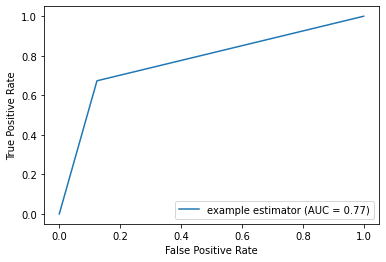

In [9]:
from sklearn import metrics

pred = FinalRFC.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()